In [1]:
import pandas as pd
import numpy as np
import csv
import matplotlib.pyplot as plt
from scipy.stats import linregress

def load_data(file_path):
    return pd.read_csv(file_path)

def preprocess_data(df):
    df['date_time'] = pd.to_datetime(df['date_time'])
    df['date_time'] = df['date_time'] - pd.Timedelta(minutes=345)
    df.set_index('date_time', inplace=True)
    return df

def hourly_average(df1, column, flag=False):
    df1['Timestamp'] = pd.to_datetime(df1['Timestamp'], format='%m/%d/%Y %H:%M')
    df1['Hour'] = df1['Timestamp'].dt.hour

    hourly_counts = df1['Hour'].value_counts()
    if any(hourly_counts < 45):
        print("Less than 45")
    else:
        hourly_average = df['PM2.5'].resample('1H').mean()
        hourly_average_df = hourly_average.to_frame()
        print(hourly_average_df1)
        plt.figure(figsize=(10, 6))
        plt.plot(hourly_average_df1.index, hourly_average_df1['PM2.5'], marker='o')
        plt.xlabel('Time')
        plt.ylabel('Hourly-Averaged PM2.5')
        plt.grid(True)
        plt.tight_layout()
        plt.show()


def main():
    
    file_path = "reference_data.csv"
    df = load_data(file_path)
    print(df)
    df = preprocess_data(df)
    print(df)

if __name__ == "__main__":
    main()


              date_time  PM10  PM2.5   PM1  Tcount
0      11/24/2021 11:47  90.7   53.0  49.4  782871
1      11/24/2021 11:48  74.7   54.2  49.5  772866
2      11/24/2021 11:49  74.0   56.1  50.4  791578
3      11/24/2021 11:50  78.1   55.8  50.1  790248
4      11/24/2021 11:51  76.0   54.2  50.5  797678
...                 ...   ...    ...   ...     ...
61775    1/6/2022 14:17  39.0    6.3   3.4   42360
61776    1/6/2022 14:18  32.4    6.0   3.3   42715
61777    1/6/2022 14:19  21.4    5.3   3.2   41765
61778    1/6/2022 14:20  24.8    6.7   3.4   45815
61779    1/6/2022 14:21  29.9    7.8   3.9   48830

[61780 rows x 5 columns]
                     PM10  PM2.5   PM1  Tcount
date_time                                     
2021-11-24 06:02:00  90.7   53.0  49.4  782871
2021-11-24 06:03:00  74.7   54.2  49.5  772866
2021-11-24 06:04:00  74.0   56.1  50.4  791578
2021-11-24 06:05:00  78.1   55.8  50.1  790248
2021-11-24 06:06:00  76.0   54.2  50.5  797678
...                   ...    ... 

In [7]:
df1 = pd.read_csv('sensor_data.csv') #read values which are only 0
def remove_non_zero(df1, column):
    df1_removed = df1[df1['PM Sensor Status'] == 0]
    return df1_removed

df1 =remove_non_zero(df1, column = 'PM Sensor Status')
print(df1)

def hourly_average(df1, column, flag = False):
    df1['Timestamp'] = pd.to_datetime(df1['Timestamp'], format='%m/%d/%Y %H:%M')
    df1['Hour'] = df1['Timestamp'].dt.hour 
    hourly_counts = df1.groupby('Hour').size()
    valid_hours = hourly_counts[hourly_counts >= 45].index.tolist()
    df1 = df1[df1['Hour'].isin(valid_hours)] #new column
    data = [[], []]
    
    for i in range(24):
        tmp = df1[df1['Hour'] == i][column]
        tmp = tmp.astype(float)

        average = np.mean(tmp)
        data[0].append(i)
        data[1].append(average)

        if flag:
            print(f'Hour {i}. Average of {column} is {average}')
    print('\n\n')
    
    np.save(column+'.npy', np.array(data))


    
if __name__ == "__main__":
    df1_orig = df1
    df1_clean = remove_non_zero(df1_orig, 'PM Sensor Status')
    hourly_average(df1_clean, 'PM2.5', flag = True)
    hourly_average(df1_clean, 'Temperature', flag = True)
    hourly_average(df1_clean, 'Relative Humidity', flag = True)
    print('\nIf you receive a Warning-Ignore it!\n')


             Timestamp  PM2.5  \
0      10/19/2021 1:59      9   
1      10/19/2021 2:00      8   
2      10/19/2021 2:01      8   
3      10/19/2021 2:02      8   
4      10/19/2021 2:03      9   
...                ...    ...   
95493  1/18/2022 22:45     29   
95494  1/18/2022 22:46     29   
95495  1/18/2022 22:47     28   
95496  1/18/2022 22:48     29   
95497  1/18/2022 22:49     29   

       Applied PM2.5 Custom Calibration Setting - Multiplication Factor  PM10  \
0                                                    NaN                    9   
1                                                    NaN                    8   
2                                                    NaN                    8   
3                                                    NaN                    8   
4                                                    NaN                    9   
...                                                  ...                  ...   
95493                               

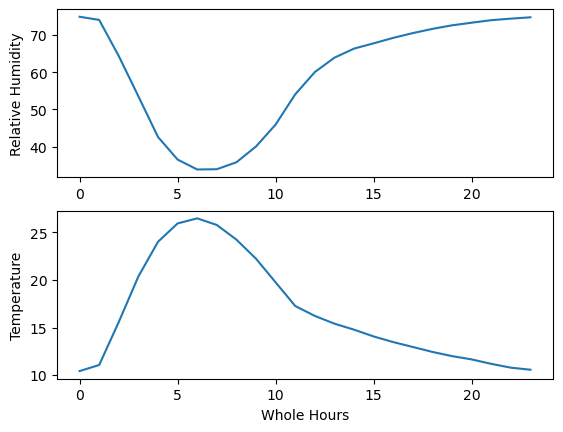

In [3]:
def plot_data(f1, f2):
    data1 = np.load(f1)
    data2 = np.load(f2)

    fig, (ax1, ax2) = plt.subplots(2, 1) #created 2 suplots
    
    ax1.plot(data1[0], data1[1]) #1
    ax1.set_ylabel(f1.split('.')[0])

    ax2.plot(data2[0], data2[1]) #2
    ax2.set_ylabel(f2.split('.')[0])
    ax2.set_xlabel('Whole Hours')
    
if __name__ == '__main__':
    plot_data('Relative Humidity.npy', 'Temperature.npy', )